# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy with full capital.
    3. If the SPY closes at a X-day high, sell some.
       If it sets further highs, sell some more, etc...
    4. If you have free cash, use it all when fresh lows are set.
    
    (optimize for number of positions)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
symbol = 'GDX'
capital = 10000
start = datetime.datetime(2000, 1, 1)
#end = datetime.datetime(2010, 12, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Define max number of positions to scale into

In [5]:
pos = range(1, 10)
pos = [str(p) for p in pos]

Run Strategy

In [6]:
strategies = pd.Series(dtype=object)
for p in pos:
    print("{0}".format(p), end=" ")
    strategies[p] = strategy.Strategy(symbol, capital, start, end, period=period, max_positions=int(p))
    strategies[p].run()
    strategies[p].tlog, strategies[p].dbal = strategies[p].get_logs()
    strategies[p].stats = strategies[p].get_stats()

1 2 3 4 5 6 7 8 9 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points',
           'pct_profitable_trades')

df = strategy.summary(strategies, metrics)
df

,1,2,3,4,5,6,7,8,9
annual_return_rate,8.89,6.99,6.68,7.19,7.41,7.57,7.59,7.42,7.15
max_closed_out_drawdown,-24.83,-31.25,-37.25,-40.61,-41.91,-43.92,-45.34,-46.71,-47.62
drawdown_annualized_return,-2.79,-4.47,-5.57,-5.65,-5.66,-5.80,-5.97,-6.29,-6.66
drawdown_recovery,-0.06,-3.52,-3.52,-3.52,-3.52,-3.12,-3.12,-3.12,-3.12
best_month,19.12,19.33,20.93,22.96,26.07,28.49,30.24,31.49,32.51
worst_month,-18.83,-18.81,-18.83,-18.82,-18.64,-19.81,-20.66,-21.27,-21.76
sharpe_ratio,0.57,0.46,0.44,0.46,0.46,0.47,0.46,0.45,0.44
sortino_ratio,0.42,0.37,0.37,0.41,0.43,0.44,0.45,0.45,0.45
monthly_std,3.81,3.99,4.26,4.55,4.77,4.99,5.19,5.37,5.49
pct_time_in_market,22.24,29.81,35.68,40.71,45.47,48.70,51.51,54.56,55.91


Bar graphs

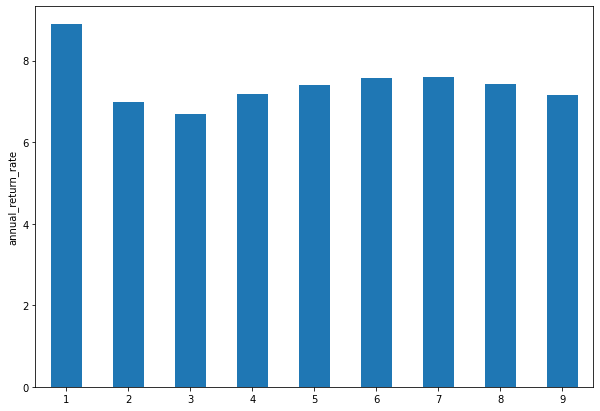

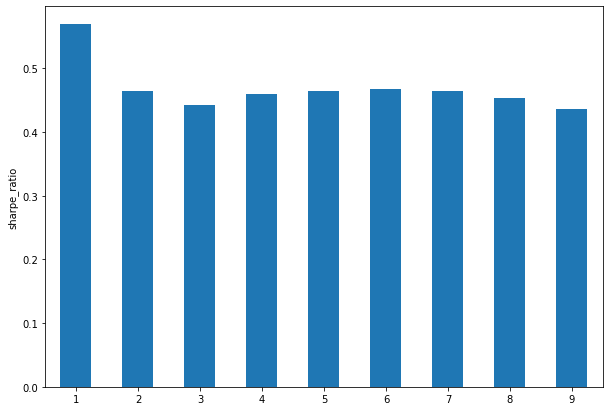

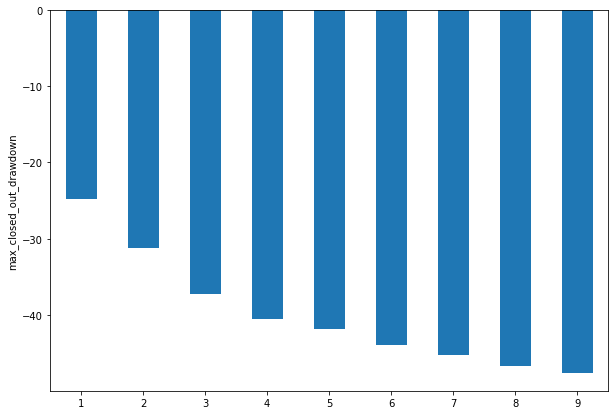

In [8]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[pos[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2007-03-08 00:00:00 BUY  260 GDX @ 38.35
2020-06-12 00:00:00 SELL 260 GDX @ 32.64


Equity curve

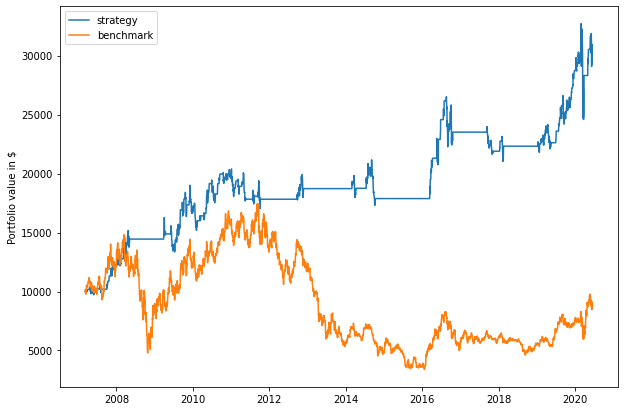

In [10]:
pf.plot_equity_curve(strategies['1'].dbal, benchmark=benchmark.dbal)